In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
# change directory
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")
!ls

'Copy of DLWP_ass_4.ipynb'		      'linear regression-auto.ipynb'
'Copy of Snippets: Importing libraries'       'linear regression.ipynb'
 creditcard.csv				       Untitled0.ipynb
 Fraud_Detection.ipynb			       Untitled1.ipynb
 house-prices-advanced-regression-techniques   Untitled2.ipynb


In [4]:
# # unzipfile
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile("/content/drive/MyDrive/Colab Notebooks/archive.zip", 'r') as zObject:

#     # Extracting all the members of the zip
#     # into a specific location.
#    zObject.extractall(path="/content/drive/MyDrive/Colab Notebooks")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # to normalize dataset (between 0-1)
from sklearn.model_selection import train_test_split # Split into train and test
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE # Balancing data based on output class
from tensorflow.keras.models import Sequential # create a neural network (cnn,ann,rnn)
from tensorflow.keras.layers import Dense # Adding layers in NN
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [6]:
df = pd.read_csv("./creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.shape

(284807, 31)

In [10]:
print("Missing Values:\n",df.isnull().sum())
print("Duplicates:",df.duplicated().sum())

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicates: 1081


In [11]:
duplicate_rows = df[df.duplicated(keep=False)]
print("\nSample of Duplicate Rows:\n", duplicate_rows.head(10))

duplicate_class_dist = duplicate_rows['Class'].value_counts()
print("\nClass Distribution of Duplicates:\n", duplicate_class_dist)


Sample of Duplicate Rows:
       Time        V1        V2        V3        V4        V5        V6  \
32    26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33    26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34    26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35    26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
113   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
220  145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
221  145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   

           V7        V8        V9  ...       V21       V22       V23  \
32   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
33   0.711206

In [12]:
# Normalize the Dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)


In [13]:
test_df=pd.DataFrame(X_res)
test_df['class']=y_res
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [14]:
test_df.shape

(568630, 31)

In [15]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,-0.159523,-1.177033,1.119850,-2.296076,1.585402,-1.147499,-0.538557,-2.227349,0.299058,-1.187856,...,0.517189,-0.008204,-0.004982,-0.086788,0.083766,0.048813,0.226298,0.138479,0.031308,0.5
std,0.987638,2.793680,2.201696,4.087645,2.232623,2.997947,1.270583,4.653394,3.946744,2.081014,...,3.711257,1.558427,1.531873,0.896929,1.171345,0.931936,2.426745,1.297151,0.915868,0.5
min,-1.996583,-28.798555,-44.035292,-31.871733,-4.013919,-82.408097,-19.636058,-35.209396,-61.302524,-12.228015,...,-47.419067,-15.065646,-71.754464,-4.683638,-19.750332,-5.401098,-55.906596,-46.746117,-0.353229,0.0
25%,-0.991825,-1.400001,-0.063914,-3.308164,-0.053667,-1.266900,-1.155701,-2.418455,-0.149548,-2.080141,...,-0.218123,-0.713732,-0.349998,-0.629874,-0.557360,-0.570522,-0.147171,-0.153398,-0.342914,0.0
50%,-0.336250,-0.369748,0.600160,-0.913338,0.950466,-0.318767,-0.517719,-0.523722,0.139095,-0.661892,...,0.208665,0.038905,-0.060032,-0.005699,0.115022,-0.036774,0.128637,0.112889,-0.262473,0.5
75%,0.793887,0.528254,1.692599,0.225026,2.950116,0.332062,0.015952,0.223545,0.732437,0.119056,...,0.882421,0.745362,0.274451,0.575738,0.746538,0.632882,1.129723,0.660864,0.046539,1.0
max,1.642058,1.253351,13.357750,6.187993,11.918743,25.214135,55.020149,97.478239,16.751534,14.194945,...,37.034714,14.473041,36.076675,7.569684,14.425318,7.293975,78.319397,102.543421,102.362243,1.0


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       568630 non-null  float64
 1   1       568630 non-null  float64
 2   2       568630 non-null  float64
 3   3       568630 non-null  float64
 4   4       568630 non-null  float64
 5   5       568630 non-null  float64
 6   6       568630 non-null  float64
 7   7       568630 non-null  float64
 8   8       568630 non-null  float64
 9   9       568630 non-null  float64
 10  10      568630 non-null  float64
 11  11      568630 non-null  float64
 12  12      568630 non-null  float64
 13  13      568630 non-null  float64
 14  14      568630 non-null  float64
 15  15      568630 non-null  float64
 16  16      568630 non-null  float64
 17  17      568630 non-null  float64
 18  18      568630 non-null  float64
 19  19      568630 non-null  float64
 20  20      568630 non-null  float64
 21  21      56

In [17]:
new_duplicate=test_df[test_df.duplicated(keep=False)]
print("After balancing dataset new Duplicates\n:",new_duplicate.head(10))

new_duplicate_count=new_duplicate['class'].value_counts()
print("Class Distribution of Duplicates:\n",new_duplicate_count)

After balancing dataset new Duplicates
:             0         1         2         3         4         5         6  \
32  -1.996036 -0.270544  0.529212  0.888538  0.102733  0.300098  0.075227   
33  -1.996036 -0.270544  0.529212  0.888538  0.102733  0.300098  0.075227   
34  -1.996036 -0.273339  0.523990  0.891063  0.104230  0.314205  0.065289   
35  -1.996036 -0.273339  0.523990  0.891063  0.104230  0.314205  0.065289   
112 -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
113 -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
114 -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
115 -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
220 -1.993530 -1.235729  1.179603  0.365141  0.694323 -0.203962  1.808162   
221 -1.993530 -1.235729  1.179603  0.365141  0.694323 -0.203962  1.808162   

            7         8         9  ...        21        22        23  \
32   0.574902  0.147416 -0.260977  ... 

In [18]:
# class 0 and 1 size before smote
class_zero=df[df['Class']==0].value_counts()
print("Before smote Class 0 size:",class_zero.shape)
class_one=df[df['Class']==1].value_counts()
print("Before smote Class 1 size:",class_one.shape)
# class 0 and 1 size after smote
class_zero_new=test_df[test_df['class']==0].value_counts()
print("After smote Class 0 size:",class_zero_new.shape)
class_one_new=test_df[test_df['class']==1].value_counts()
print("After smote Class 1 size:",class_one_new.shape)

Before smote Class 0 size: (283253,)
Before smote Class 1 size: (473,)
After smote Class 0 size: (283253,)
After smote Class 1 size: (276845,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [20]:
# Helper function to build and train model
def build_and_evaluate_model(activation_hidden, optimizer_name):
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation=activation_hidden),
        Dense(16, activation=activation_hidden),
        Dense(1, activation='sigmoid')
    ])

    optimizer = {
        'SGD': SGD(),
        'Adam': Adam(),
        'RMSProp': RMSprop()
    }[optimizer_name]

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=0, validation_split=0.2)

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'Accuracy for {activation_hidden} with {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"\nResults for Activation: {activation_hidden}, Optimizer: {optimizer_name}")
    print("\nClassification Report:\n",classification_report(y_test, y_pred))
    print("\nConfusion matrix:\n",confusion_matrix(y_test, y_pred))

    # Print final metrics
    final_train_loss = history.history['loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    print(f"Final Training Loss: {final_train_loss:.4f}, Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}, Accuracy: {final_val_acc:.4f}")

    return history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


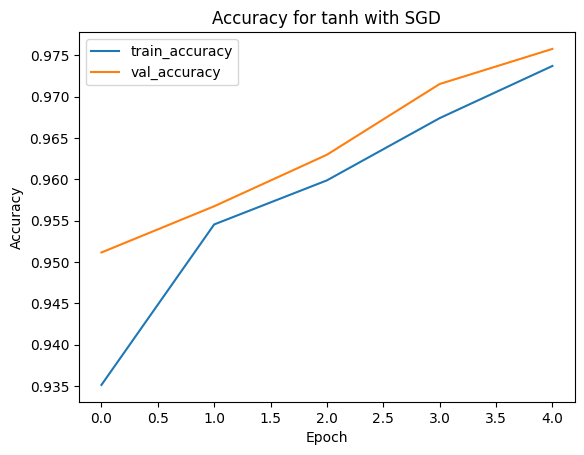

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step  

Results for Activation: tanh, Optimizer: SGD

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     85149
           1       0.98      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589


Confusion matrix:
 [[83327  1822]
 [ 2288 83152]]
Final Training Loss: 0.0757, Accuracy: 0.9737
Final Validation Loss: 0.0717, Accuracy: 0.9758


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


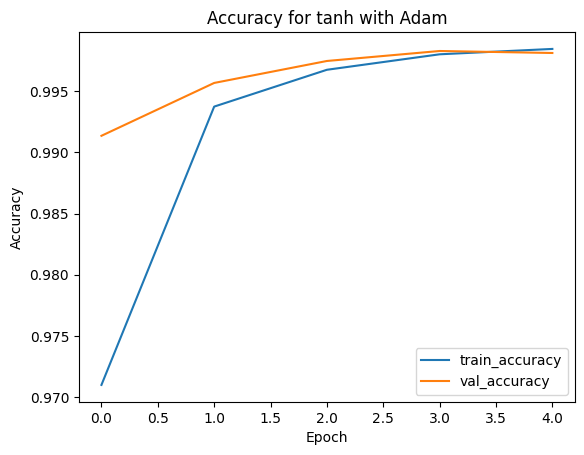

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 996us/step

Results for Activation: tanh, Optimizer: Adam

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Confusion matrix:
 [[84821   328]
 [    0 85440]]
Final Training Loss: 0.0076, Accuracy: 0.9985
Final Validation Loss: 0.0077, Accuracy: 0.9981


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


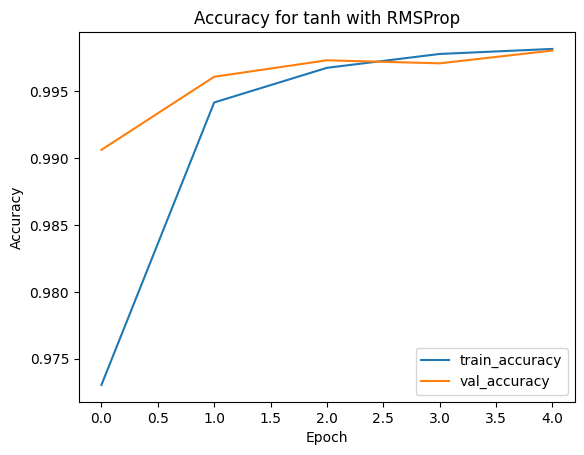

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

Results for Activation: tanh, Optimizer: RMSProp

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Confusion matrix:
 [[84840   309]
 [   24 85416]]
Final Training Loss: 0.0078, Accuracy: 0.9982
Final Validation Loss: 0.0068, Accuracy: 0.9980


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


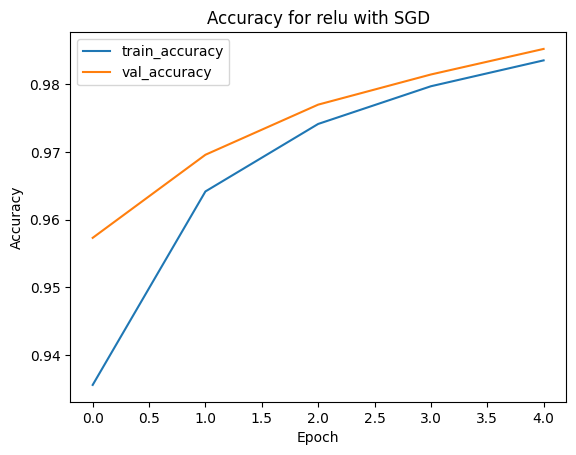

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

Results for Activation: relu, Optimizer: SGD

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     85149
           1       0.98      0.99      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589


Confusion matrix:
 [[83836  1313]
 [ 1150 84290]]
Final Training Loss: 0.0468, Accuracy: 0.9835
Final Validation Loss: 0.0439, Accuracy: 0.9852


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


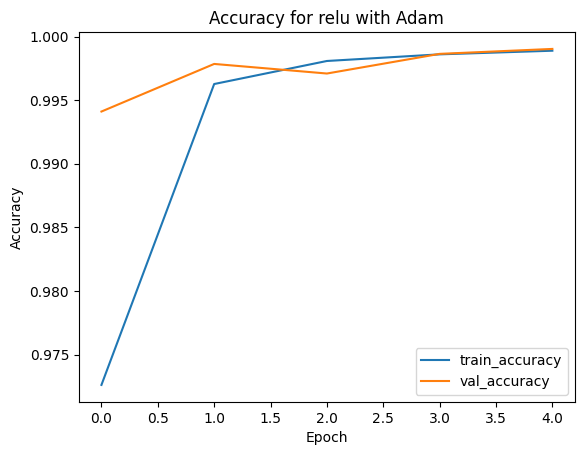

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Results for Activation: relu, Optimizer: Adam

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Confusion matrix:
 [[84943   206]
 [    0 85440]]
Final Training Loss: 0.0053, Accuracy: 0.9989
Final Validation Loss: 0.0050, Accuracy: 0.9990


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


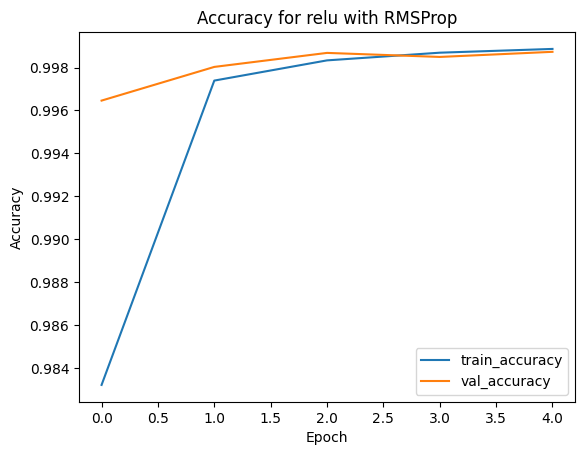

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

Results for Activation: relu, Optimizer: RMSProp

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Confusion matrix:
 [[84858   291]
 [    0 85440]]
Final Training Loss: 0.0056, Accuracy: 0.9989
Final Validation Loss: 0.0070, Accuracy: 0.9987


In [21]:

# 5. Try different activation functions and optimizers
results = {}
for activation in ['tanh', 'relu']:
    for optimizer in ['SGD', 'Adam', 'RMSProp']:
        hist = build_and_evaluate_model(activation, optimizer)
        results[f"{activation}_{optimizer}"] = hist


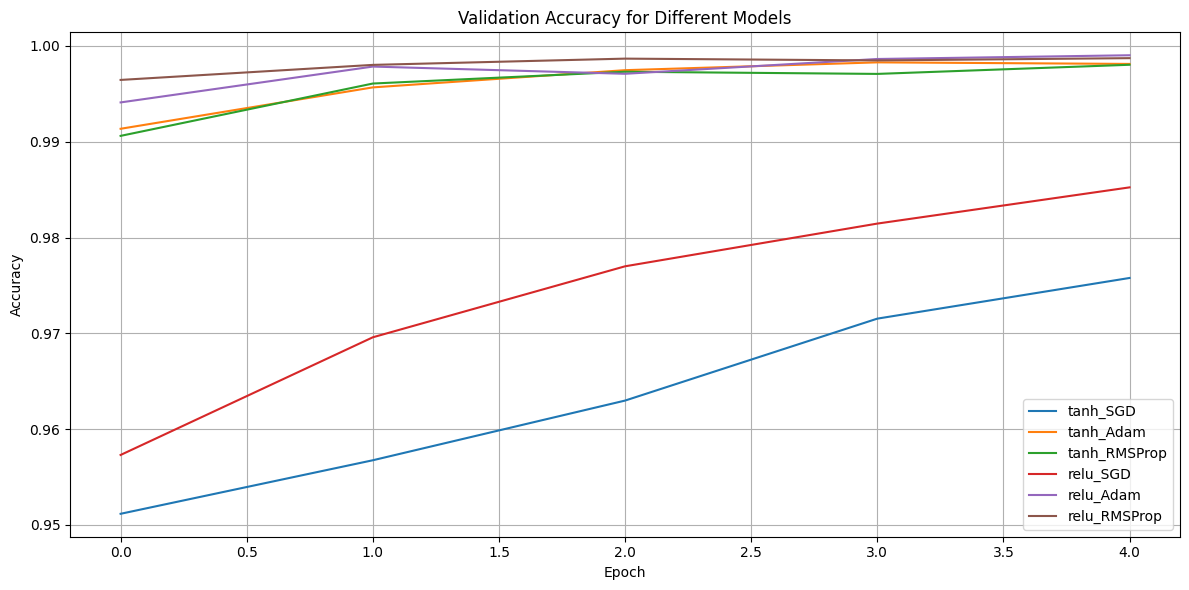

In [22]:
# 6. Plot training accuracy
plt.figure(figsize=(12, 6))
for key, hist in results.items():
    plt.plot(hist.history['val_accuracy'], label=key)
plt.title("Validation Accuracy for Different Models")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
print("--- Training the Best Performing Model (relu, Adam) ---")

best_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

best_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = best_model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.2)
print("\n--- Model Training Complete ---")

print("\n--- Section for Predicting New Credit Card Transactions ---")

def predict_new_transaction(model, scaler, transaction_features_raw_dict):
    original_feature_columns = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']

    try:
        input_data_ordered = [transaction_features_raw_dict[col] for col in original_feature_columns]
    except KeyError as e:
        print(f"Error: Missing feature in input data: {e}. Please provide all 30 features.")
        return "Prediction Failed (Missing Data)"

    new_transaction_df = pd.DataFrame([input_data_ordered], columns=original_feature_columns)

    new_transaction_scaled = scaler.transform(new_transaction_df)

    prediction_probability = model.predict(new_transaction_scaled, verbose=0)
    prediction_class = (prediction_probability > 0.5).astype("int32")

    print(f"\nPrediction Probability: {prediction_probability[0][0]:.4f}")
    if prediction_class[0][0] == 0:
        return "Non-Fraud"
    else:
        return "Fraud"

new_transaction_data_example_1 = {
    'Time': 80000.0,
    'V1': 0.05, 'V2': 0.1, 'V3': 0.2, 'V4': 0.1, 'V5': 0.05, 'V6': 0.1, 'V7': 0.08, 'V8': 0.03, 'V9': 0.01, 'V10': 0.05,
    'V11': 0.02, 'V12': 0.01, 'V13': 0.03, 'V14': 0.005, 'V15': 0.01, 'V16': 0.02, 'V17': 0.01, 'V18': 0.005, 'V19': 0.02, 'V20': 0.01,
    'V21': 0.005, 'V22': 0.01, 'V23': 0.005, 'V24': 0.01, 'V25': 0.005, 'V26': 0.01, 'V27': 0.005, 'V28': 0.005,
    'Amount': 35.0
}

print("\n--- Predicting Example Transaction 1 (Likely Non-Fraud) ---")
predicted_label_1 = predict_new_transaction(best_model, scaler, new_transaction_data_example_1)
print(f"Result: {predicted_label_1}")




--- Training the Best Performing Model (relu, Adam) ---
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9466 - loss: 0.1451 - val_accuracy: 0.9938 - val_loss: 0.0221
Epoch 2/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9959 - loss: 0.0167 - val_accuracy: 0.9975 - val_loss: 0.0106
Epoch 3/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9981 - loss: 0.0084 - val_accuracy: 0.9985 - val_loss: 0.0074
Epoch 4/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9988 - loss: 0.0061 - val_accuracy: 0.9987 - val_loss: 0.0075
Epoch 5/5
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9989 - val_loss: 0.0046



--- Model Training Complete ---

--- Section for Predicting New Credit Card Transactions ---

--- Predicting Example Transaction 1 (Likely Non-Fraud) ---

Prediction Probability: 0.9987
Result: Fraud


In [29]:
new_transaction_data_example_2 = {
    'Time': 100000.0,
    'V1': -10.0, 'V2': -15.0, 'V3': -8.0, 'V4': 5.0, 'V5': -7.0, 'V6': -3.0, 'V7': -10.0, 'V8': 1.0, 'V9': -5.0, 'V10': -8.0,
    'V11': 2.0, 'V12': -6.0, 'V13': 1.0, 'V14': -7.0, 'V15': 0.5, 'V16': -4.0, 'V17': -5.0, 'V18': -2.0, 'V19': 1.0, 'V20': 0.5,
    'V21': 2.0, 'V22': 0.5, 'V23': 0.8, 'V24': 0.6, 'V25': 0.7, 'V26': 0.8, 'V27': 0.9, 'V28': 0.9,
    'Amount': 2500.0
}
print("\n--- Predicting Example Transaction 2 (Likely Fraud) ---")
predicted_label_2 = predict_new_transaction(best_model, scaler, new_transaction_data_example_2)
print(f"Result: {predicted_label_2}")


--- Predicting Example Transaction 2 (Likely Fraud) ---

Prediction Probability: 0.9998
Result: Fraud
